#                                     CCT COLLEGE DUBLIN 
##                                            Assessment Cover Page

### Module Title: Machine Learning for AI
### Assignment Type: Individual 
### Assessment Title: ML_CA2
### Lecturer : David McQuaid
### Issue Date:	13 May 2024
### Submission Deadline Date:	31 May 2024
### Student Full Name: Daniel Freitas Ferreira
### Student Number: 2020335


### gitHub link : https://github.com/Daniel-Ferreira2020335/ML_CA2




**PART 1. NEURAL NETWORKS**

Install the libraries using pip command

In [1]:
pip install pandas scikit-learn tensorflow numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


 Data Preparation

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
data = pd.read_csv('BankRecords.csv')
print(data.isnull().sum())
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numerical_columns = ['Age', 'Experience(Years)', 'Family', 'Credit Score', 'Mortgage(Thousands\'s)']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])
X = data.drop('Income(Thousands\'s)', axis=1)
y = data['Income(Thousands\'s)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64


Neural Network Model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
def create_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model
model = create_model()
model.summary()
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=36, verbose=1)
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Mean Absolute Error is: {mae}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7157.4971 - mae: 70.7172 - val_loss: 4232.1494 - val_mae: 48.3321
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2754.3792 - mae: 39.5012 - val_loss: 1499.0015 - val_mae: 31.5396
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1356.4606 - mae: 30.0217 - val_loss: 1190.5316 - val_mae: 27.9749
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1014.6738 - mae: 25.5279 - val_loss: 1089.0336 - val_mae: 26.3700
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 956.8123 - mae: 24.6721 - val_loss: 1049.7920 - val_mae: 26.0644
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1006.0948 - mae: 25.1403 - val_loss: 1042.6810 - val_mae: 25.4710
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 917.3940 - mae: 23.7300 - val_loss: 1016.3592 - val_mae: 25.7402
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 915.0241 - mae: 24.0828 - val_loss: 1011.1758 - val_mae: 25.7084
Epo

Standard Machine Learning Regressor

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mae_regressor = mean_absolute_error(y_test, y_pred)
print(f"Linear Regression Mean Absolute Error is: {mae_regressor}")

Linear Regression Mean Absolute Error is: 23.64152232428843


Prediction on New Customer Income

In [12]:
new_customer_data = {
    'Age': 47,
    'Experience(Years)': 3,
    'Sort Code': 96754,
    'Family': 3,
    'Credit Score': 1.8,
    'Education': 'Degree',
    'Mortgage(Thousands\'s)': 80,
    'Personal Loan': 'No',
    'Securities Account': 'No',
    'CD Account': 'No',
    'Online Banking': 'Yes',
    'CreditCard': 'No'
}
new_customer_dataframe = pd.DataFrame([new_customer_data])
processed_new_customer_data = preprocessor.transform(new_customer_dataframe)
nn_predict = model.predict(processed_new_customer_data)
print(f"Neural Network predicted an income of: {nn_predict[0][0]}")
lr_predict = regressor.predict(processed_new_customer_data)
print(f"Linear Regression predicted an income of: {lr_predict[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Neural Network predicted an income of: 48.66679000854492
Linear Regression predicted an income of: 45.79326931954736


**Rationale behind data preparation and how it will assist**

Loading the Dataset

*Rationale:* The initial step involves loading the dataset into a DataFrame for easy manipulation and analysis. 
*How it Helps:* This allows us to inspect the data structure and identify any potential issues such as missing values or incorrect data types.

Checking for Missing Values

*Rationale:* Identifying missing values is important because many machine learning algorithms cannot handle them directly. Ensuring there are no missing values prevents errors during model training and improves model performance.
*How it Helps:* This step ensures data completeness and reliability, which is essential for building accurate models.

Encoding Categorical Variables

*Rationale:* Machine learning models, including neural networks and regressors, typically require numerical input. Categorical variables need to be converted into a numerical format. We use OneHotEncoder for this purpose.
*How it Helps:* One-hot encoding transforms categorical variables into a binary matrix, preserving the categorical information without introducing ordinality. This helps the model to correctly interpret categorical features.

Standardizing Numerical Features

*Rationale:* Numerical features can vary in scale and units. Standardizing (or normalizing) these features ensures that they contribute equally to the model’s learning process. StandardScaler is used to transform these features to have a mean of 0 and a standard deviation of 1.
*How it Helps:* Standardization helps in speeding up the convergence of gradient descent in neural networks and ensures that the model does not become biased towards features with larger scales.

Separating Features and Target Variable

*Rationale:* It is important to separate the independent variables (features) from the dependent variable (target). This distinction is crucial for training the model to predict the target variable.
*How it Helps:* Clear separation of features and target allows for the proper training of the model and ensures that the model learns to predict the target variable based on the features.

Splitting the Dataset into Training and Testing Sets

*Rationale:* To evaluate the model’s performance, the dataset is split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.
*How it Helps:* This split helps in assessing the model’s generalization capability and prevents overfitting by ensuring the model is evaluated on data it has not seen during training.

**Findings**

Based on the results, we have the following Mean Absolute Error (MAE) for the two models:

Neural Network Mean Absolute Error (MAE): 21.40922737121582
Linear Regression Mean Absolute Error (MAE): 23.64152232428843
The lower MAE indicates that the neural network model performs better in predicting the "Income (Thousands')" compared to the linear regression model.

**Final Rationale for Choosing a Particular Regression Algorithm**

While linear regression offers simplicity and interpretability, the choice of the regression algorithm depends on the context of the problem and the goal of the analysis. Given the results:

*Prediction Accuracy:* Since the primary goal is to achieve the most accurate predictions for the "Income (Thousands')" of customers, the neural network is the preferred choice due to its lower MAE.

*Model Complexity and Data Characteristics:* The neural network's ability to capture complex, non-linear relationships in the data makes it more suitable for this problem, assuming that the income prediction involves such complexities.

*Scalability:* Neural networks can handle larger and more complex datasets effectively , providing better scalability for future extensions of the project with sufficient computational resources, .

**Prediction for New Customer income**

*Neural Network Prediction*

The neural network can capture complex and non-linear relationships between the input features and the target variable (income). The predicted income of 48.67 thousand dollars suggests that the neural network has identified patterns and interactions among the features that result in this income level for the new customer.The model's architecture, number of layers, neurons per layer, activation functions, and the training process influence the prediction. The model has learned from the training data to make accurate predictions based on these factors.

*Linear Regression Prediction*
Linear regression assumes a linear relationship between the features and the target variable. The predicted income of 45.79 thousand dollars is derived from a weighted sum of the input features, where each feature's contribution is determined by the learned coefficients during training. The linear regression model's prediction is easier to interpret as it directly correlates with the input features. Each feature's contribution to the predicted income can be understood by examining the model's coefficients.



**PART 2. SEMANTIC ANALYSIS**

*Installing the libraries using pip*

In [1]:
pip install pandas numpy matplotlib seaborn wordcloud textblob

                                              0.0/300.2 kB ? eta -:--:--
     ---                                   30.7/300.2 kB 660.6 kB/s eta 0:00:01
     ---                                   30.7/300.2 kB 660.6 kB/s eta 0:00:01
     ---                                   30.7/300.2 kB 660.6 kB/s eta 0:00:01
     ------                                51.2/300.2 kB 238.1 kB/s eta 0:00:02
     --------                              71.7/300.2 kB 280.5 kB/s eta 0:00:01
     ------------                         102.4/300.2 kB 368.6 kB/s eta 0:00:01
     ------------                         102.4/300.2 kB 368.6 kB/s eta 0:00:01
     --------------                       122.9/300.2 kB 312.9 kB/s eta 0:00:01
     ------------------------             204.8/300.2 kB 479.2 kB/s eta 0:00:01
     ------------------------------       256.0/300.2 kB 561.1 kB/s eta 0:00:01
     -------------------------------      266.2/300.2 kB 565.1 kB/s eta 0:00:01
     ------------------------------------ 300.2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Data Preparation

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('tweets.csv', encoding='latin1')
data.head()
print(data.isnull().sum())
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text) 
    text = re.sub(r'RT\s+', '', text) 
    text = re.sub(r'\s+', ' ', text)  
    text = text.strip() 
    return text
data['clean_text'] = data['text'].apply(preprocess_text)

Unnamed: 0           0
text                 0
favorited            0
favoriteCount        0
replyToSN        14603
created              0
truncated            0
replyToSID       14631
id                   0
replyToUID       14603
statusSource         0
screenName           0
retweetCount         0
isRetweet            0
retweeted            0
longitude        14996
latitude         14996
dtype: int64


Sentiment Analysis

In [4]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
data['sentiment'] = data['clean_text'].apply(get_sentiment)
print(data['sentiment'].value_counts())

sentiment
neutral     8378
positive    5517
negative    1105
Name: count, dtype: int64


Visualization

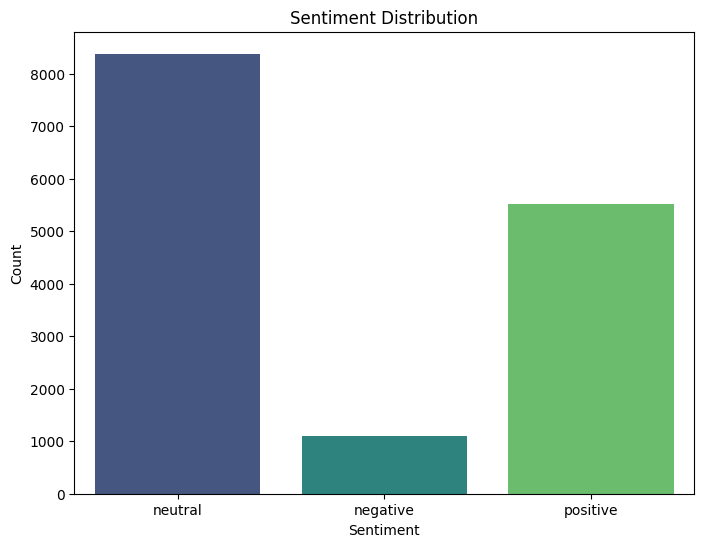

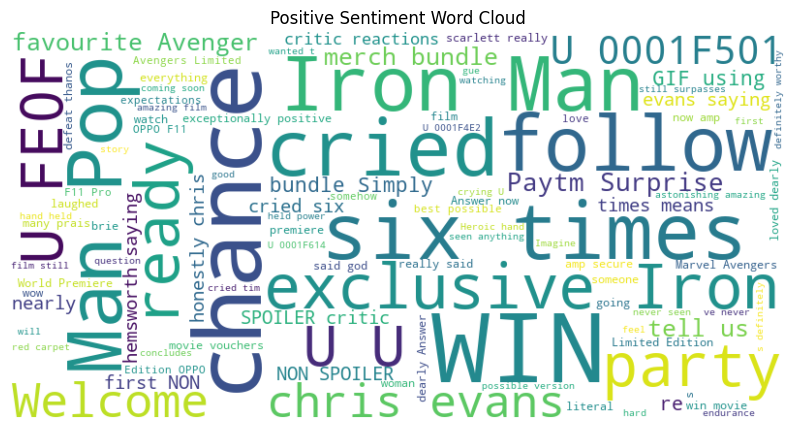

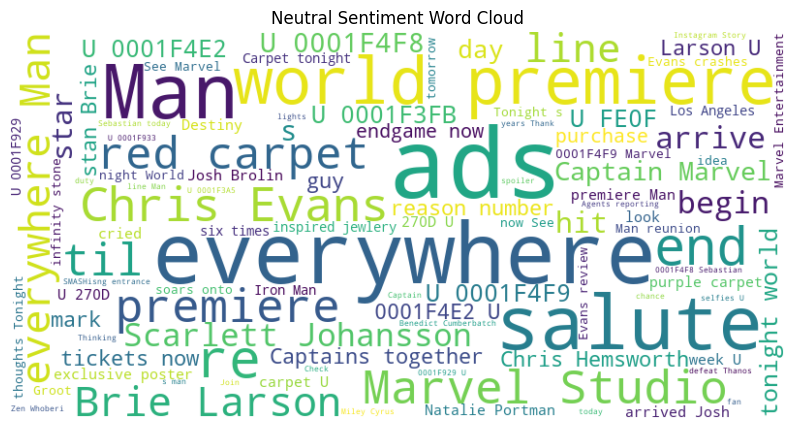

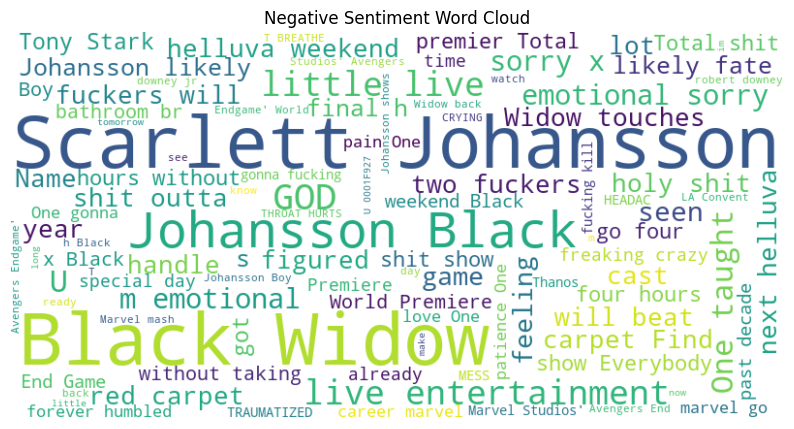

In [6]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', hue='sentiment', data=data, palette='viridis', dodge=False, legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
positive_text = ' '.join(data[data['sentiment'] == 'positive']['clean_text'])
neutral_text = ' '.join(data[data['sentiment'] == 'neutral']['clean_text'])
negative_text = ' '.join(data[data['sentiment'] == 'negative']['clean_text'])
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=100, background_color='white').generate(text)
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
plot_wordcloud(positive_text, 'Positive Sentiment Word Cloud')
plot_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')
plot_wordcloud(negative_text, 'Negative Sentiment Word Cloud')

**Rationale Behind Data Preparation**

1. Handling Missing Values

Rationale: Missing values can skew analysis and model training. Checking for and addressing missing values ensures data integrity.

2. Text Preprocessing

Rationale: Raw text data often contains noise like URLs, mentions, hashtags, retweets, and extra whitespace that don't contribute to the sentiment and can mislead analysis.

3. Sentiment Analysis

Rationale: To understand the sentiment expressed in the tweets (positive, neutral, negative). This helps in analyzing public opinion and emotional tone.

**How Data Preparation Assists Analysis**

*Improved Data Quality*

Removing noise (URLs, mentions, hashtags, retweets, and extra whitespaces) ensures the text data is consistent and relevant for sentiment analysis.By focusing on the main content of the tweets, we enhance the accuracy of sentiment detection. Cleaning text also reduces the dimensionality and complexity of data, leading to faster processing and better model performance.

*Enhanced Sentiment Analysis*

We can easily analyze the distribution of sentiments by classifying tweets into positive, neutral, and negative, .Clean and well-processed data provides clearer insights into public opinion and sentiment trends, which can be valuable for businesses, marketers, and researchers.

*Effective Visualization*

Cleaned data ensures that visualizations (for example, sentiment distribution plots, word clouds) accurately represent the underlying sentiment without noise interference. Visualizations based on clean data help in easily identifying patterns, trends, and outliers, making the analysis more insightful and actionable.

**Sentiment Analysis Findings**

The sentiment analysis of the dataset yielded the following distribution of sentiments:

Neutral Sentiment: 8378 tweets
Positive Sentiment: 5517 tweets
Negative Sentiment: 1105 tweets

This distribution of sentiments indicates that the majority of tweets are neutral, followed by a substantial number of positive tweets, and a smaller number of negative tweets. This suggests that:

-Over half of the tweets are neutral. This could mean that many users are sharing factual information, making statements, or engaging in discussions without expressing strong emotions.

-A significant proportion of tweets are positive. This indicates that users are generally expressing favorable opinions, satisfaction, or enthusiasm about the topic.

-The smallest group of tweets is negative. While this is the smallest segment, it is still important as it represents dissatisfaction, complaints, or negative experiences.
